### Notebook para leer un archivo de excel con varias hojas y agruparlar en un solo dataframe

#### Fecha Creación: 10 Feb 2022

### Fecha de Modificación 14 Feb 2022

#### Programador: Rafael Mata

---

In [459]:
# importar librerías

import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

In [525]:
#leer el archivo excel con pandas, esto genera un diccionarios de Data Frames con cada hoja de excel

file = 'datos-2022.xlsx'

df_dict = pd.read_excel(file, sheet_name=None, header= None)

print('Cantidad de hojas leídas: {}'.format(len(df_dict)))

Cantidad de hojas leídas: 33


In [526]:
# Definir diccionario con los tipos

tipos = {'Aeroenergía': 'Eolica',
                          'Altamira':  'Hidro',
                         'Angostura': 'Eolica',
                            'Arenal':  'Hidro',
                    'Balsa Inferior': 'Eolica',
                       'Barro Morado':  'Hidro',
                              'Belén': 'Eolica',
                            'Bijagua':  'Hidro',
                           'Birris12': 'Eolica',
                            'Birris3':  'Hidro',
                       'Boca de Pozo': 'Eolica',
                             'Brasil':  'Hidro',
                              'Cachí': 'Eolica',
                      'Campos Azules':  'Hidro',
                           'Canalete': 'Eolica',
                         'Cariblanco':  'Hidro',
                        'Caño Grande': 'Eolica',
                    'Caño Grande III':  'Hidro',
                            'Chiripa': 'Eolica',
                        'Chocosuelas':  'Hidro',
                               'Cote': 'Eolica',
                          'Cubujuquí':  'Hidro',
                   'Daniel Gutiérrez': 'Eolica',
                              'Dengo':  'Hidro',
                         'Doña Julia': 'Eolica',
                            'Echandi':  'Hidro',
                           'El Angel': 'Eolica',
                'El Angel Ampliación':  'Hidro',
                         'El Embalse': 'Eolica',
                         'El Encanto':  'Hidro',
                         'El General': 'Eolica',
                           'El Viejo':  'Hidro',
                         'Electriona': 'Eolica',
                           'Garabito':  'Hidro',
                             'Garita': 'Eolica',
                           'Guápiles':  'Hidro',
                        'Hidrozarcas': 'Eolica',
                  'Intercambio Norte':  'Hidro',
                    'Intercambio Sur': 'Eolica',
                 'Jorge Manuel Dengo':  'Hidro',
              'La Esperanza (CoopeL)': 'Eolica',
                            'La Joya':  'Hidro',
                      'Las Pailas II': 'Eolica',
                         'Los Negros':  'Hidro',
                      'Los Negros II': 'Eolica',
                         'Los Santos':  'Hidro',
                             'MOVASA': 'Eolica',
                          'Matamoros':  'Hidro',
                       'Miravalles I': 'Eolica',
                      'Miravalles II':  'Hidro',
                     'Miravalles III': 'Eolica',
                       'Miravalles V':  'Hidro',
                            'Moín II': 'Eolica',
                           'Moín III':  'Hidro',
                              'Orosí': 'Eolica',
                            'Orotina':  'Hidro',
                           'PE Cacao': 'Eolica',
                          'PE Mogote':  'Hidro',
                     'PE Río Naranjo': 'Eolica',
                                'PEG':  'Hidro',
                             'Pailas': 'Eolica',
             'Parque Solar Juanilama':  'Hidro',
            'Parque Solar Miravalles': 'Eolica',
                      'Peñas Blancas':  'Hidro',
                             'Pirrís': 'Eolica',
                           'Platanar':  'Hidro',
                            'Pocosol': 'Eolica',
                           'Rebeca I':  'Hidro',
                         'Reventazón': 'Eolica',
                          'Río Lajas':  'Hidro',
                          'Río Macho': 'Eolica',
                        'Río Segundo':  'Hidro',
                    'San Lorenzo (C)': 'Eolica',
                          'Sandillal':  'Hidro',
                       'Santa Rufina': 'Eolica',
                           'Suerkata':  'Hidro',
                             'Taboga': 'Eolica',
                            'Tacares':  'Hidro',
                            'Tapezco': 'Eolica',
                             'Tejona':  'Hidro',
                           'Tilawind': 'Eolica',
                             'Torito':  'Hidro',
                             'Toro I': 'Eolica',
                            'Toro II':  'Hidro',
                           'Toro III': 'Eolica',
                       'Tuis (JASEC)':  'Hidro',
                      'Valle Central': 'Eolica',
                        'Vara Blanca':  'Hidro',
                           'Ventanas': 'Eolica',
                    'Ventanas-Garita':  'Hidro',
                'Vientos de La Perla': 'Eolica',
                 'Vientos de Miramar':  'Hidro',
                   'Vientos del Este': 'Eolica',
                             'Chucás':  'Hidro'
                                               }


In [527]:


# Funcion para crear una columna multi index con el nombre y el tipo    
def Asignar_tipo(df, tipos):
    plantas = df.columns # Obtener los nombres de las plantas
    lista_tipos = []
    for planta in plantas:
        lista_tipos.append(tipos[planta])
    nombres = [plantas,lista_tipos]
    multi_column = pd.MultiIndex.from_arrays(nombres,names=['Planta','Tipo'])
    df.columns = multi_column
        
    return df

In [528]:
#Convertir el diccionario de dataframes, a un solo dataframe, agregando una columna adicional con el nombre de cada hoja


df_final = pd.DataFrame()   # Crear un dataframe para almacenar el data frame final

for hoja in df_dict.keys():      # Recorrer cada hoja del diccionario
    df_temp = df_dict[hoja]      # Extraer el dataframe de cada hoja
    df_temp.columns = ['Planta','0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
    # df_temp = Asignar_tipo(df_temp)     #Asignar el tipo
    df_temp.set_index('Planta',inplace=True)
    df_temp = df_temp.T          # Transpuesta
    df_temp['Hoja'] = hoja       # Agregar columna con el nombre de la hoja
    df_final = pd.concat([df_final,df_temp], axis=0)   # Agrugar los dataframes
    
df_final.fillna(0,inplace=True)
df_final.reset_index(inplace=True)
df_final.rename(columns={'index':'Hora'}, inplace=True)
df_final['Fecha'] = df_final.Hoja + ' ' + df_final.Hora 
df_final['Fecha'] = pd.to_datetime(df_final['Fecha'], format = '%d-%m-%y %H')
df_final.drop(['Hora','Hoja'],axis=1, inplace=True)
df_final.set_index(['Fecha'],inplace=True)
df_final = Asignar_tipo(df_final, tipos)

In [529]:
df_final.head()

Planta,Aeroenergía,Altamira,Angostura,Arenal,Balsa Inferior,Barro Morado,Belén,Bijagua,Birris12,Birris3,...,Toro III,Tuis (JASEC),Valle Central,Vara Blanca,Ventanas,Ventanas-Garita,Vientos de La Perla,Vientos de Miramar,Vientos del Este,Chucás
Tipo,Eolica,Hidro,Eolica,Hidro,Eolica,Hidro,Eolica,Hidro,Eolica,Hidro,...,Eolica,Hidro,Eolica,Hidro,Eolica,Hidro,Eolica,Hidro,Eolica,Hidro
Fecha,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,3.919878,20.180587,49.628,130.2100,0.000000,0.0,6.8952,-0.080439,0.0,0.0,...,15.419,0.0,5.4043,0.9870,0.0296,49.7410,17.852020,15.021310,9.064494,0.0
2022-01-01 01:00:00,4.030251,20.271959,5.190,161.2720,0.000000,0.0,6.8693,-0.087283,0.0,0.0,...,12.896,0.0,6.4713,0.9891,0.0299,47.7200,16.625615,15.032318,9.113946,0.0
2022-01-01 02:00:00,4.157082,20.364863,0.000,161.3060,4.735662,0.0,6.8817,-0.083922,0.0,0.0,...,0.000,0.0,5.1336,0.9870,0.0303,17.3815,16.964965,13.581691,9.118438,0.0
2022-01-01 03:00:00,4.235456,20.414328,0.000,156.2430,5.010898,0.0,6.8869,-0.065961,0.0,0.0,...,0.000,0.0,4.0221,0.9870,0.0302,0.0000,18.328561,15.660175,9.116118,0.0
2022-01-01 04:00:00,4.266979,20.466662,0.000,140.7725,5.004477,0.0,6.8842,-0.093911,0.0,0.0,...,0.000,0.0,1.7884,0.9870,0.0295,0.0000,19.582982,17.097598,9.116049,0.0


### Para manipular el indice tipo time

In [336]:
df_final.index.year   #Para sacar año
df_final.index.month  #Para sacar mes
df_final.index.isocalendar().week # Para obtener semana
df_final.index.day  #Para obtener dia
df_final.index.hour  #Para obtener hora

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='Fecha', length=792)

### Para seleccionar una Planta específica

In [337]:
planta = 'Altamira'
df_final.loc[:,planta]

Tipo,Hidro
Fecha,
2022-01-01 00:00:00,20.180587
2022-01-01 01:00:00,20.271959
2022-01-01 02:00:00,20.364863
2022-01-01 03:00:00,20.414328
2022-01-01 04:00:00,20.466662
...,...
2022-02-02 19:00:00,17.116390
2022-02-02 20:00:00,18.359490
2022-02-02 21:00:00,18.943160


### Para seleccionar varias plantas

In [338]:
plantas = ['Altamira', 'Angostura']
df_final.loc[:,plantas]

Planta,Altamira,Angostura
Tipo,Hidro,Eolica
Fecha,,
2022-01-01 00:00:00,20.180587,49.628
2022-01-01 01:00:00,20.271959,5.190
2022-01-01 02:00:00,20.364863,0.000
2022-01-01 03:00:00,20.414328,0.000
2022-01-01 04:00:00,20.466662,0.000
...,...,...
2022-02-02 19:00:00,17.116390,104.634
2022-02-02 20:00:00,18.359490,108.720


### Para seleccionar las plantas por tipo

In [339]:
tipo = 'Eolica'
df_final.iloc[:, df_final.columns.get_level_values(1)==tipo]

Planta,Aeroenergía,Angostura,Balsa Inferior,Belén,Birris12,Boca de Pozo,Cachí,Canalete,Caño Grande,Chiripa,...,Santa Rufina,Taboga,Tapezco,Tilawind,Toro I,Toro III,Valle Central,Ventanas,Vientos de La Perla,Vientos del Este
Tipo,Eolica,Eolica,Eolica,Eolica,Eolica,Eolica,Eolica,Eolica,Eolica,Eolica,...,Eolica,Eolica,Eolica,Eolica,Eolica,Eolica,Eolica,Eolica,Eolica,Eolica
Fecha,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,3.919878,49.628,0.000000,6.8952,0.0000,4.492,52.91425,0.000000,1.55394,46.908843,...,0.297150,10.390441,0.102375,4.642978,6.99700,15.4190,5.4043,0.0296,17.852020,9.064494
2022-01-01 01:00:00,4.030251,5.190,0.000000,6.8693,0.0000,4.492,52.65500,0.000000,1.55916,47.178799,...,0.296362,9.829783,0.101587,6.650332,7.00000,12.8960,6.4713,0.0299,16.625615,9.113946
2022-01-01 02:00:00,4.157082,0.000,4.735662,6.8817,0.0000,4.496,40.15625,0.000000,1.56402,47.298413,...,0.295837,9.187304,0.102375,5.734745,7.00100,0.0000,5.1336,0.0303,16.964965,9.118438
2022-01-01 03:00:00,4.235456,0.000,5.010898,6.8869,0.0000,4.492,39.94375,0.000000,1.55736,47.512285,...,0.294262,12.125763,0.102112,4.481219,6.99800,0.0000,4.0221,0.0302,18.328561,9.116118
2022-01-01 04:00:00,4.266979,0.000,5.004477,6.8842,0.0000,4.496,39.99825,0.000000,1.56852,47.458915,...,0.291900,11.015410,0.102375,8.564609,6.99600,0.0000,1.7884,0.0295,19.582982,9.116049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-02 19:00:00,2.894570,104.634,12.231198,7.6622,14.9363,4.736,69.99729,15.554461,1.94778,44.832750,...,0.301350,10.163070,0.052237,4.135540,6.96875,15.3110,0.6987,0.8312,11.562820,8.616570
2022-02-02 20:00:00,3.475130,108.720,2.974729,7.6633,0.6106,4.736,48.53095,0.109631,1.12986,45.263940,...,0.295312,9.915300,0.053550,7.304740,6.96825,16.8855,0.1042,0.0322,13.656800,9.045580


### Para agrupar los datos por dia / semana / mes / año

In [382]:
muestra = 'D'  # DIA / 'W': Semana / 'M': Mes / 'Y': Year
plantas = ['Angostura','Cachí']
df = df_final[plantas].resample(muestra).sum()  # sum() para sumarizar, pero se puede usar mean() para el promedio u otras funciones

In [383]:
df.head()

Planta,Angostura,Cachí
Tipo,Eolica,Eolica
Fecha,,
2022-01-01,731.962,735.15925
2022-01-02,1550.294,1125.92075
2022-01-03,1466.490,997.76425
2022-01-04,1470.724,1243.68650
2022-01-05,1902.970,1665.57100


---

### Realizar el gráfico

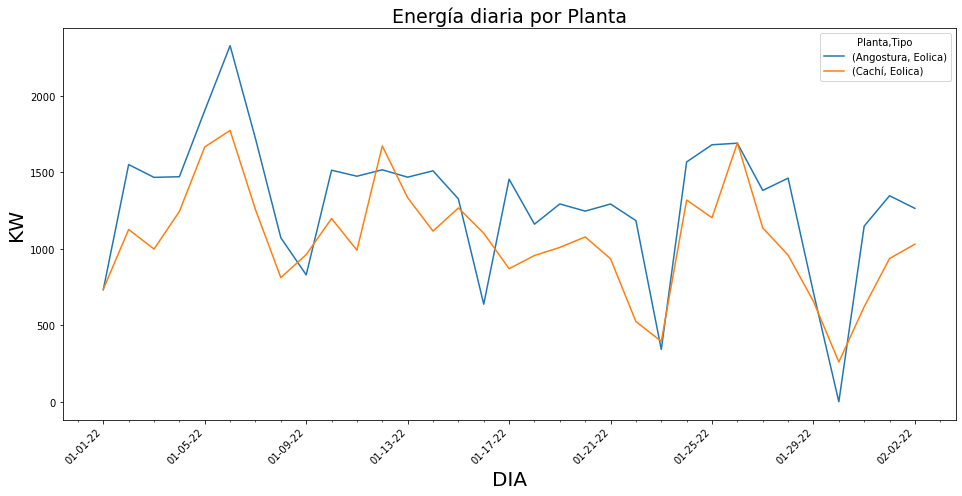

In [392]:
#pd.plotting.plot_params = {'x_compat': True}

fig,ax = plt.subplots(1, 1, figsize=(16, 8))
df.plot(ax=ax);
ax.set_title('Energía diaria por Planta',fontsize=19);
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
#xticks = df.index
#ax.set_xticklabels([x.strftime('%Y-%m-%d') for x in xticks]);
plt.xticks(rotation=45);



---

### Generar una ventana deslizante en el tiempo para obtener el promedio especificando el período

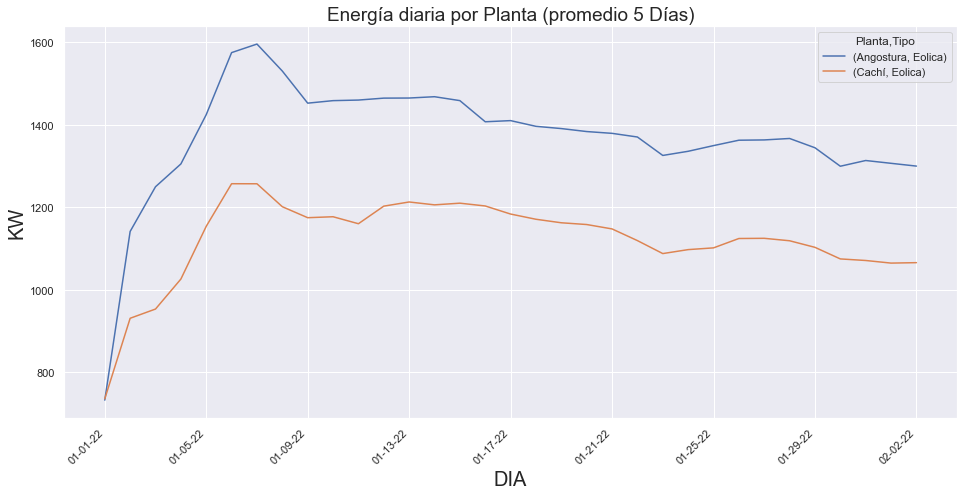

In [533]:
periodo = '30D' #Se especifica el periodo de la ventana deslizante , esto genera una curva mas suave y muestra la tendencia



fig,ax = plt.subplots(1, 1, figsize=(16, 8))

df.rolling(window=periodo).mean().plot(ax=ax) #Generar el rolling window


ax.set_title('Energía diaria por Planta (promedio 5 Días)',fontsize=19);
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
#xticks = df.index
#ax.set_xticklabels([x.strftime('%Y-%m-%d') for x in xticks]);
plt.xticks(rotation=45);

plt.xlabel('DIA',fontsize=20);
plt.ylabel('KW',fontsize=20);

## Usar la librería SEABORN para gráficar, tiene mejores gráficos  que matplotlib

### HEATMAP

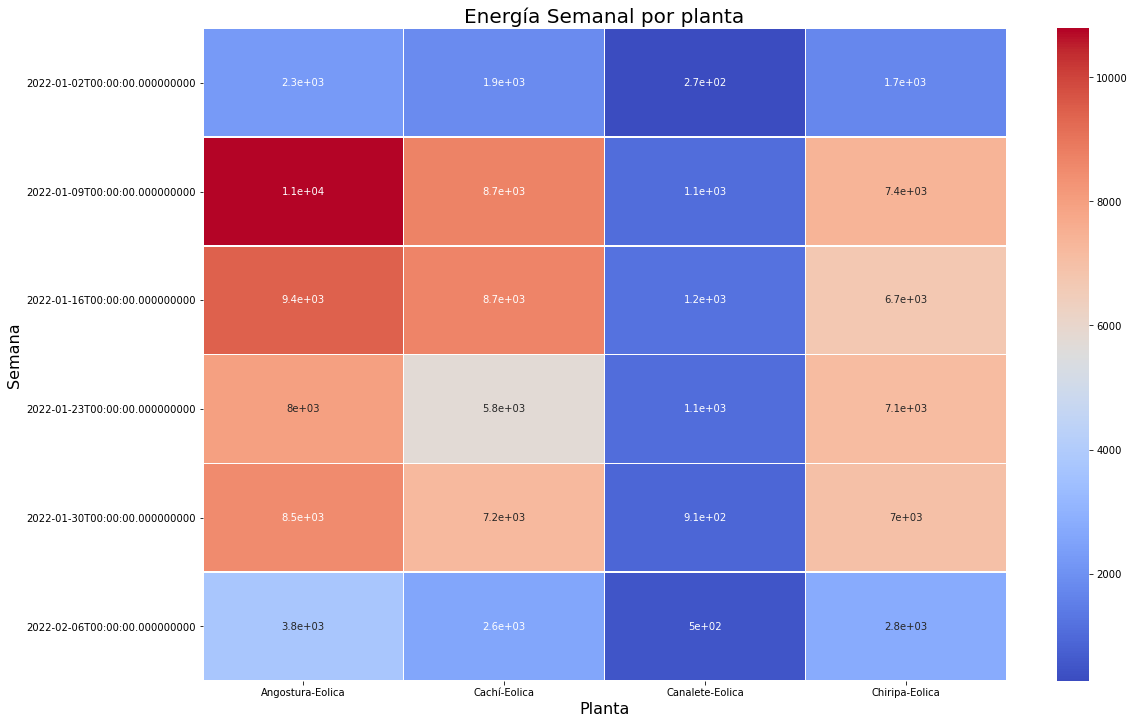

In [402]:
# Generar un HEAT MAP

plantas = ['Angostura','Cachí','Canalete','Chiripa']
muestra = 'W'
df1 = df_final[plantas].resample(muestra).sum()

fig, ax = plt.subplots(1, 1, figsize=(18, 12))

sns.heatmap(df1, annot=True, cmap='coolwarm',linewidths=.5)
ax.set_title('Energía Semanal por planta',fontsize=20)
ax.set_xlabel('Planta',fontsize=16)
ax.set_ylabel('Semana',fontsize=16);

### Histograma

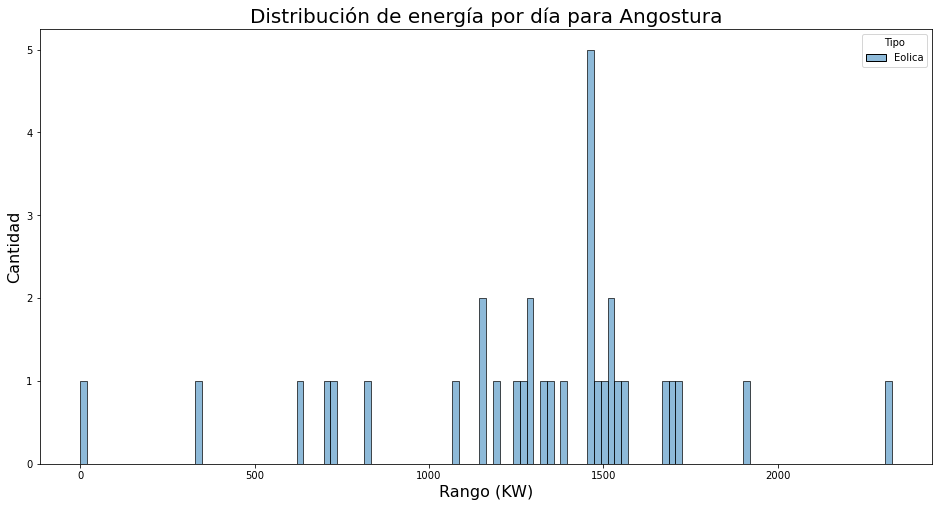

In [404]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.histplot(df['Angostura'], bins=120)
ax.set_title('Distribución de energía por día para Angostura',fontsize=20)
ax.set_xlabel('Rango (KW)',fontsize=16)
ax.set_ylabel('Cantidad',fontsize=16);

### Lineplot

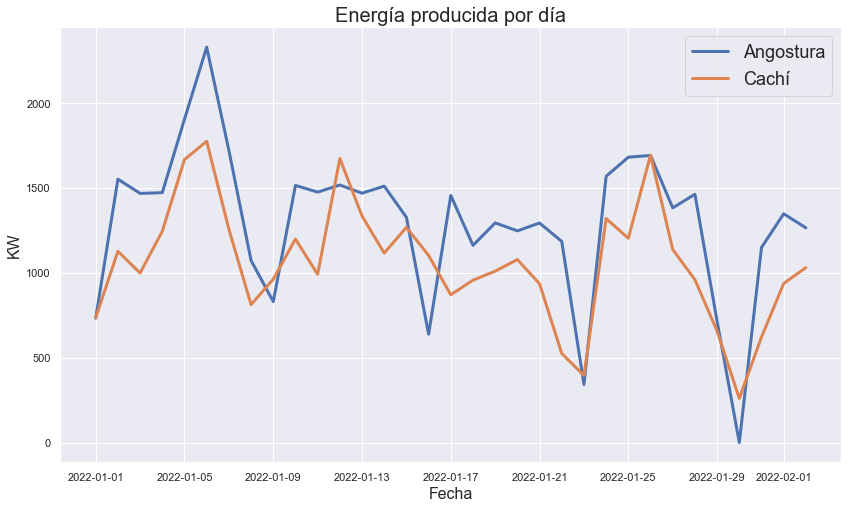

In [473]:
#Obtener los datos

sns.set_theme(style="darkgrid")

datos1 =  np.reshape(df.Angostura.values, -1)
datos2 = np.reshape(df['Cachí'].values, -1)

plt.figure(figsize=(14,8))
sns.lineplot( x=df.index,y=datos1, lw=3)
sns.lineplot( x=df.index,y=datos2, lw=3)

plt.grid(True);
plt.title('Energía producida por día', fontsize=20)
plt.xlabel('Fecha',fontsize=16)
plt.ylabel('KW',fontsize=16);
plt.legend(['Angostura','Cachí'],fontsize=18);